Libray importing

In [ ]:
import pandas as pd
import datetime
!pip install geopandas
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing datasets

In [ ]:
df = pd.read_csv('datacovid.csv')
ds= pd.read_csv('school.csv')
dfr = pd.read_csv('restrictions.csv')
dfy= pd.read_csv('gdp.csv')
vac=pd.read_csv('datacovid_vaccination.csv')

Lets check df dataset

In [ ]:
df.isnull().sum()
cases_median = df["cases"].median()
df["cases"].fillna(cases_median, inplace=True)
deaths_median = df["deaths"].median()
df["deaths"].fillna(deaths_median, inplace=True)


In [ ]:
df.countriesAndTerritories.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

We need to merge datasets

In [ ]:
merged_dataset = pd.merge(df, dfr, on=['dateRep', 'countryterritoryCode'])
dfy['dateRep'] = dfy['dateRep'].astype(str)
merged_dataset['dateRep2'] = pd.to_datetime(merged_dataset['dateRep']).dt.year
dfy = dfy.rename(columns={'dateRep': 'dateRep2'})
merged_dataset['dateRep2'] = merged_dataset['dateRep2'].astype(str)
merged_datasetf = pd.merge(merged_dataset, dfy, on=[ 'dateRep2','countryterritoryCode'])
merged_datasetfb = pd.merge(merged_datasetf, ds, on=[ 'dateRep','countryterritoryCode'])

<ipython-input-16-3b8184e75386>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_dataset['dateRep2'] = pd.to_datetime(merged_dataset['dateRep']).dt.year


In [ ]:
dfr.dtypes

Entity                           object
countryterritoryCode             object
dateRep                          object
international_travel_controls     int64
dtype: object

The vaccination dataset has different date format. In order to merge it we need to change it.

In [ ]:
def iso_to_normal(iso_date):
    # Split the year and week number
    year, week_num = iso_date.split("-W")
    # Define the date of the first day of the week
    first_day = datetime.datetime.strptime(f'{year}-W{int(week_num)-1}-1', "%Y-W%W-%w")
    # Calculate the date of the last day of the week
    last_day = first_day + datetime.timedelta(days=6)
    # Convert the last day to a string in the format "DD/MM/YYYY"
    normal_date = last_day.strftime("%d/%m/%Y")
    return normal_date


# Apply the function to the column containing the ISO week dates
vac['dateRep'] = vac['YearWeekISO'].apply(iso_to_normal)

# Print the updated DataFrame
print(vac.head())

  YearWeekISO ReportingCountry  Denominator  NumberDosesReceived  \
0    2020-W53               AT    7388778.0                  0.0   
1    2020-W53               AT    7388778.0                  0.0   
2    2020-W53               AT    7388778.0                  0.0   
3    2020-W53               AT    7388778.0                  0.0   
4    2020-W53               AT    7388778.0                  0.0   

   NumberDosesExported  FirstDose  FirstDoseRefused  SecondDose  \
0                  0.0          0               NaN           0   
1                  0.0          0               NaN           0   
2                  0.0          0               NaN           0   
3                  0.0          0               NaN           0   
4                  0.0          0               NaN           0   

   DoseAdditional1  DoseAdditional2  DoseAdditional3  UnknownDose Region  \
0                0                0                0            8     AT   
1                0                0 

In [ ]:
code_map = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'HR': 'HRV', 'CY': 'CYP',
            'CZ': 'CZE', 'DK': 'DNK', 'EE': 'EST', 'FI': 'FIN', 'FR': 'FRA',
            'DE': 'DEU', 'EL': 'GRC', 'HU': 'HUN', 'IS': 'ISL', 'IE': 'IRL',
            'IT': 'ITA', 'LV': 'LVA', 'LI': 'LIE', 'LT': 'LTU', 'LU': 'LUX',
            'MT': 'MLT', 'NL': 'NLD', 'NO': 'NOR', 'PL': 'POL', 'PT': 'PRT',
            'RO': 'ROU', 'SK': 'SVK', 'SI': 'SVN', 'ES': 'ESP', 'SE': 'SWE'}
vac['countryterritoryCode'] = vac['Region'].map(code_map)

In [ ]:
merged_datasetfu.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2020', 'continentExp', 'Entity_x',
       'international_travel_controls', 'dateRep2', 'Country', 'GDP',
       'Entity_y', 'school_closures', 'YearWeekISO', 'ReportingCountry',
       'Denominator', 'NumberDosesReceived', 'NumberDosesExported',
       'FirstDose', 'FirstDoseRefused', 'SecondDose', 'DoseAdditional1',
       'DoseAdditional2', 'DoseAdditional3', 'UnknownDose', 'Region',
       'TargetGroup', 'Vaccine', 'Population'],
      dtype='object')

In [ ]:
merged_datasetfu['Entity_x'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark',
       'Estonia', 'Germany', 'Greece'], dtype=object)

Now we can merge it to our dataset.

In [ ]:
merged_datasetfu = pd.merge(merged_datasetfb, vac, on=[ 'dateRep','countryterritoryCode'])

In [ ]:
merged_datasetfu['TargetGroup'].unique()

array(['ALL', 'Age0_4', 'Age10_14', 'Age15_17', 'Age18_24', 'Age25_49',
       'Age50_59', 'Age5_9', 'Age60_69', 'Age70_79', 'Age80+', 'Age<18',
       'AgeUNK', 'HCW', 'LTCF', '1_Age60+', '1_Age<60'], dtype=object)

In [ ]:
merged_datasetfu.dtypes

dateRep                           object
day                                int64
month                              int64
year                               int64
cases                            float64
deaths                           float64
countriesAndTerritories           object
geoId                             object
countryterritoryCode              object
popData2020                        int64
continentExp                      object
Entity_x                          object
international_travel_controls      int64
dateRep2                          object
Country                           object
GDP                              float64
Entity_y                          object
school_closures                    int64
YearWeekISO                       object
ReportingCountry                  object
FirstDose                          int64
SecondDose                         int64
DoseAdditional1                    int64
DoseAdditional2                    int64
DoseAdditional3 

In [ ]:
merged_datasetfu.isnull().sum()

dateRep                          0
day                              0
month                            0
year                             0
cases                            0
deaths                           0
countriesAndTerritories          0
geoId                            0
countryterritoryCode             0
popData2020                      0
continentExp                     0
Entity_x                         0
international_travel_controls    0
dateRep2                         0
Country                          0
GDP                              0
Entity_y                         0
school_closures                  0
YearWeekISO                      0
ReportingCountry                 0
FirstDose                        0
SecondDose                       0
DoseAdditional1                  0
DoseAdditional2                  0
DoseAdditional3                  0
UnknownDose                      0
Region                           0
TargetGroup                      0
Vaccine             

In [ ]:
merged_datasetfu = merged_datasetfu.dropna(axis=1)

In [ ]:
finald=merged_datasetfu.drop(columns=['day', 'month','year','countriesAndTerritories','countryterritoryCode','popData2020','continentExp','dateRep2','Entity_x','dateRep2','Country','Entity_y','YearWeekISO','ReportingCountry','Region'])

In [ ]:
finald

,dateRep,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population
0,23/10/2022,3557.0,0.0,AT,0,52061.652,2,5.0,1.0,15.0,922.0,22.0,0.0,ALL,MODBA.1,8978929.0
1,23/10/2022,3557.0,0.0,AT,0,52061.652,2,12.0,24.0,85.0,1579.0,39.0,0.0,ALL,COMBA.1,8978929.0
2,23/10/2022,3557.0,0.0,AT,0,52061.652,2,0.0,2.0,6.0,18.0,0.0,0.0,ALL,NVXD,8978929.0
3,23/10/2022,3557.0,0.0,AT,0,52061.652,2,18.0,34.0,15.0,44.0,3.0,0.0,ALL,VLA,8978929.0
4,23/10/2022,3557.0,0.0,AT,0,52061.652,2,242.0,155.0,1906.0,51569.0,1315.0,0.0,ALL,COMBA.4-5,8978929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55032,03/01/2021,16194.0,178.0,ES,3,30089.517,3,0.0,0.0,0.0,0.0,0.0,0.0,LTCF,JANSS,47398695.0
55033,03/01/2021,16194.0,178.0,ES,3,30089.517,3,0.0,0.0,0.0,0.0,0.0,0.0,LTCF,AZ,47398695.0
55034,03/01/2021,16194.0,178.0,ES,3,30089.517,3,0.0,0.0,0.0,0.0,0.0,0.0,LTCF,COMBIV,47398695.0
55035,03/01/2021,16194.0,178.0,ES,3,30089.517,3,0.0,0.0,0.0,0.0,0.0,0.0,LTCF,MODBIV,47398695.0


In [ ]:
finald.dtypes

dateRep                           object
cases                            float64
deaths                           float64
geoId                             object
international_travel_controls      int64
GDP                              float64
school_closures                    int64
Denominator                      float64
NumberDosesReceived              float64
NumberDosesExported              float64
FirstDose                          int64
FirstDoseRefused                 float64
SecondDose                         int64
DoseAdditional1                    int64
DoseAdditional2                    int64
DoseAdditional3                    int64
UnknownDose                        int64
TargetGroup                       object
Vaccine                           object
Population                         int64
dtype: object

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
finald['geoIdv'] = le.fit_transform(finald['geoId'].astype(str))
finald['TargetGroup'] = le.fit_transform(finald['TargetGroup'].astype(str))
finald['Vaccine'] = le.fit_transform(finald['Vaccine'].astype(str))

In [ ]:
variances = finald.var()
variances

<ipython-input-108-9f56f8d6b7ac>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = finald.var()


cases                            2.536442e+08
deaths                           2.766431e+03
international_travel_controls    1.469530e+00
GDP                              7.491781e+08
school_closures                  7.375595e-01
FirstDose                        2.980463e+09
SecondDose                       2.772753e+09
DoseAdditional1                  3.575736e+09
DoseAdditional2                  8.477741e+07
DoseAdditional3                  4.819617e+05
UnknownDose                      7.170686e+06
TargetGroup                      1.734743e+01
Vaccine                          2.016300e+01
Population                       2.480534e+14
geoIdv                           6.664284e+01
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd




# Extract the features you want to scale
features_to_scale = ['Population', 'cases', 'GDP']

# Create a scaler object
scaler = StandardScaler()

# Scale the selected features
finald[features_to_scale] = scaler.fit_transform(finald[features_to_scale])

# Display the scaled dataset
print(finald)


           dateRep     cases  deaths geoId  international_travel_controls  \
0       23/10/2022 -0.117799     0.0    AT                              0   
1       23/10/2022 -0.117799     0.0    AT                              0   
2       23/10/2022 -0.117799     0.0    AT                              0   
3       23/10/2022 -0.117799     0.0    AT                              0   
4       23/10/2022 -0.117799     0.0    AT                              0   
...            ...       ...     ...   ...                            ...   
140385  27/12/2020 -0.139713    99.0    SE                              3   
140386  27/12/2020 -0.139713    99.0    SE                              3   
140387  27/12/2020 -0.139713    99.0    SE                              3   
140388  27/12/2020 -0.139713    99.0    SE                              3   
140389  27/12/2020 -0.139713    99.0    SE                              3   

             GDP  school_closures  FirstDose  SecondDose  DoseAdditional1  

In [ ]:
finald.columns

Index(['dateRep', 'cases', 'deaths', 'geoId', 'international_travel_controls',
       'GDP', 'school_closures', 'FirstDose', 'SecondDose', 'DoseAdditional1',
       'DoseAdditional2', 'DoseAdditional3', 'UnknownDose', 'TargetGroup',
       'Vaccine', 'Population', 'geoIdv'],
      dtype='object')

<ipython-input-58-bb91a1666b8f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = subset_df.corr()


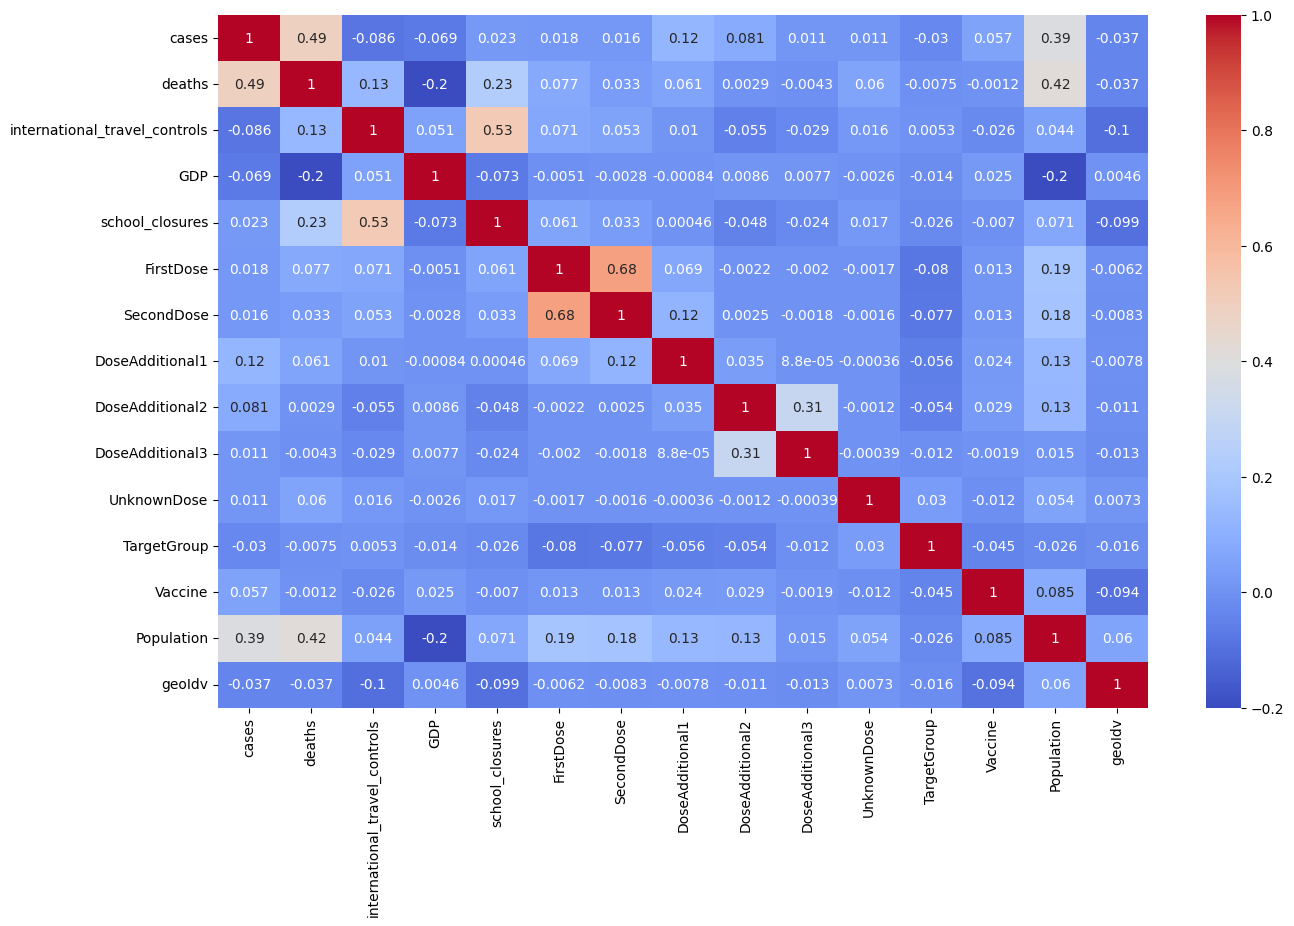

In [ ]:

columns_of_interest=finald.columns
# create a new DataFrame with only the columns of interest
subset_df = finald[columns_of_interest]

# calculate the correlation matrix for the subset DataFrame
corr = subset_df.corr()

# plot the correlation heatmap using seaborn
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

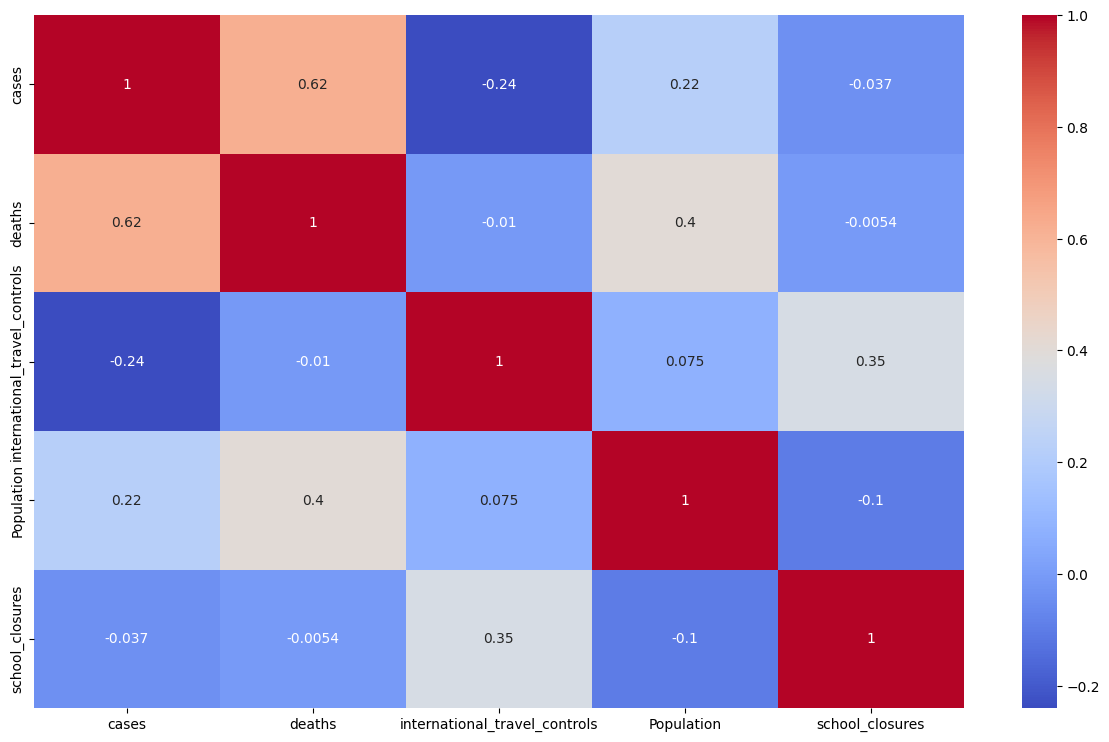

In [ ]:
columns_of_interest = ['cases', 'deaths', 'international_travel_controls','Population','school_closures']

# create a new DataFrame with only the columns of interest
subset_df = merged_datasetfu[columns_of_interest]

# calculate the correlation matrix for the subset DataFrame
corr = subset_df.corr()

# plot the correlation heatmap using seaborn
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
merged_datasetfu.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2020', 'continentExp', 'Entity_x',
       'international_travel_controls', 'dateRep2', 'Country', 'GDP',
       'Entity_y', 'school_closures', 'YearWeekISO', 'ReportingCountry',
       'FirstDose', 'SecondDose', 'DoseAdditional1', 'DoseAdditional2',
       'DoseAdditional3', 'UnknownDose', 'Region', 'TargetGroup', 'Vaccine',
       'Population'],
      dtype='object')

<ipython-input-89-1a02aa32a32b>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  c['dateRep'] = pd.to_datetime(c['dateRep'])
<ipython-input-89-1a02aa32a32b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['dateRep'])
<ipython-input-89-1a02aa32a32b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['da

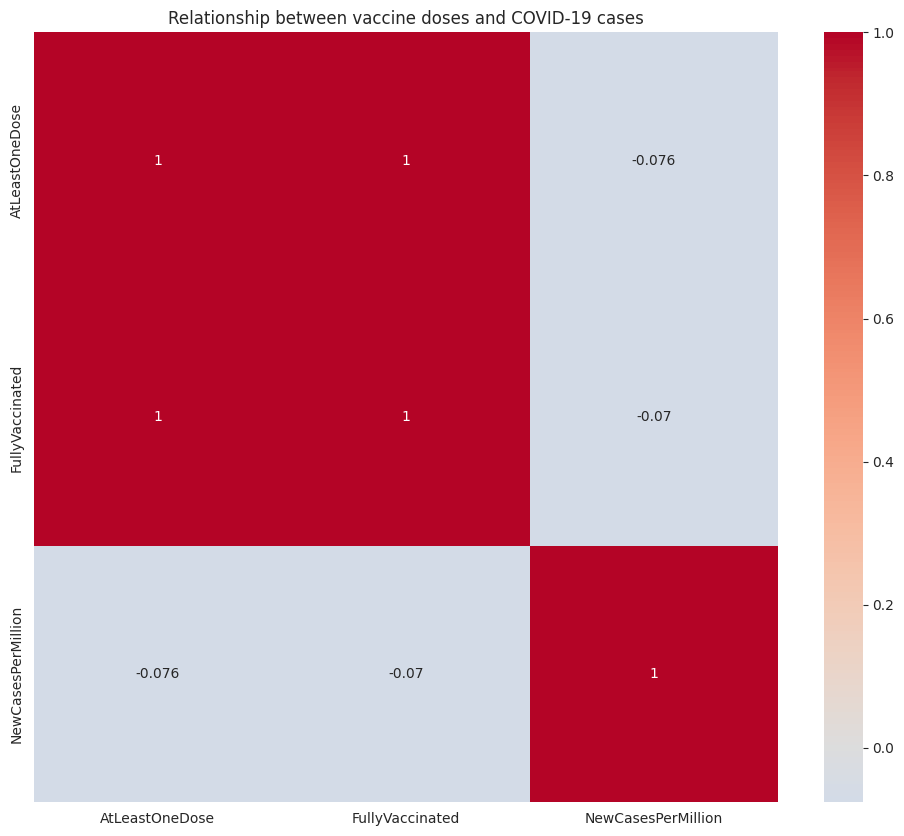

In [ ]:
cols = ['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'FirstDose', 'SecondDose', 'Population']
c = merged_datasetfu[cols]

# Convert dateRep column to datetime
c['dateRep'] = pd.to_datetime(c['dateRep'])

# Group the data by country and date
c['dateRep'] = pd.to_datetime(c['dateRep'])

# Group the data by country and date

# Group the data by country and date
grouped = c.groupby(['countriesAndTerritories', 'dateRep']).sum()

# Calculate the total number of vaccine doses administered per day
grouped['TotalDoses'] = grouped['FirstDose'] + grouped['SecondDose']

# Calculate the percentage of the population that has received at least one dose of the vaccine
grouped['AtLeastOneDose'] = grouped['FirstDose'] / grouped['Population'] * 100

# Calculate the percentage of the population that has received both doses of the vaccine
grouped['FullyVaccinated'] = grouped['SecondDose'] / grouped['Population'] * 100

# Calculate the daily new cases per million people
grouped['NewCasesPerMillion'] = grouped['cases'] / grouped['Population'] * 1000000

# Create a new dataframe with the average percentage of population vaccinated and daily new cases per million people for each country
avg_vaccine = grouped.groupby('countriesAndTerritories').mean()[['AtLeastOneDose', 'FullyVaccinated']]
avg_cases = grouped.groupby('countriesAndTerritories').mean()['NewCasesPerMillion']
c = pd.concat([avg_vaccine, avg_cases], axis=1)

# Create heatmap
sns.set_style("white")
plt.figure(figsize=(12,10))
plt.title('Relationship between vaccine doses and COVID-19 cases')
sns.heatmap(c.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
merged_datasetfu

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,...,ReportingCountry,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,AT,5,1,15,922,22,0,AT,ALL,MODBA.1
1,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,AT,12,24,85,1579,39,0,AT,ALL,COMBA.1
2,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,AT,0,2,6,18,0,0,AT,ALL,NVXD
3,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,AT,18,34,15,44,3,0,AT,ALL,VLA
4,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,AT,242,155,1906,51569,1315,0,AT,ALL,COMBA.4-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51835,03/01/2021,3,1,2021,16194.0,178.0,Spain,ES,ESP,47332614,...,ES,0,0,0,0,0,0,ES,LTCF,JANSS
51836,03/01/2021,3,1,2021,16194.0,178.0,Spain,ES,ESP,47332614,...,ES,0,0,0,0,0,0,ES,LTCF,AZ
51837,03/01/2021,3,1,2021,16194.0,178.0,Spain,ES,ESP,47332614,...,ES,0,0,0,0,0,0,ES,LTCF,COMBIV
51838,03/01/2021,3,1,2021,16194.0,178.0,Spain,ES,ESP,47332614,...,ES,0,0,0,0,0,0,ES,LTCF,MODBIV


<ipython-input-42-7f29b63cc295>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  c['dateRep'] = pd.to_datetime(c['dateRep'])
<ipython-input-42-7f29b63cc295>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['dateRep'])
<ipython-input-42-7f29b63cc295>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['da

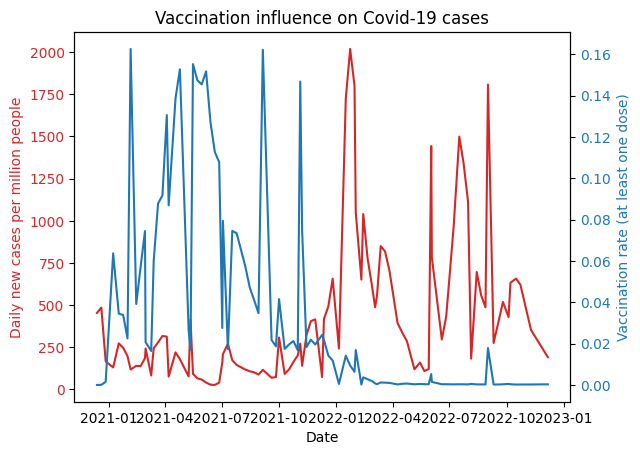

In [ ]:
cols = ['dateRep', 'cases', 'deaths','FirstDose', 'SecondDose', 'Population']
c = merged_datasetfu[cols]

# Convert dateRep column to datetime
c['dateRep'] = pd.to_datetime(c['dateRep'])

# Group the data by country and date
c['dateRep'] = pd.to_datetime(c['dateRep'])
grouped = c.groupby('dateRep').sum()

# Calculate the total number of vaccine doses administered per day
grouped['TotalDoses'] = grouped['FirstDose'] + grouped['SecondDose']

# Calculate the percentage of the population that has received at least one dose of the vaccine
grouped['AtLeastOneDose'] = grouped['FirstDose'] / grouped['Population'] * 100

# Calculate the daily new cases per million people
grouped['NewCasesPerMillion'] = grouped['cases'] / grouped['Population'] * 1000000

# Create line chart
fig, ax1 = plt.subplots()

# Plot daily new cases on the first axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily new cases per million people', color=color)
ax1.plot(grouped.index, grouped['NewCasesPerMillion'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Add a second axis for vaccination rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vaccination rate (at least one dose)', color=color)
ax2.plot(grouped.index, grouped['AtLeastOneDose'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Vaccination influence on Covid-19 cases')
plt.show()

<ipython-input-91-cd991e03066c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['dateRep'] = pd.to_datetime(c['dateRep'])


KeyError: ignored

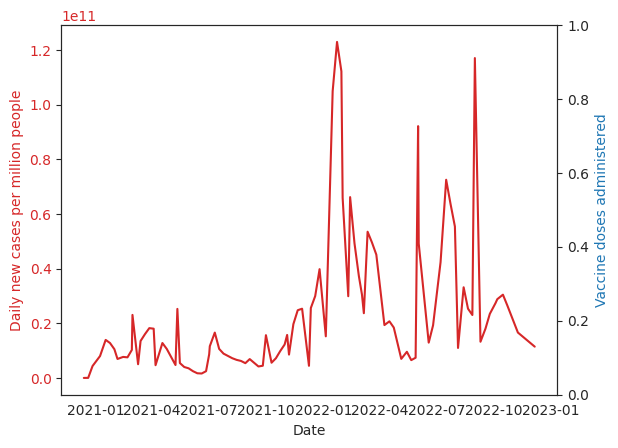

In [ ]:
c['dateRep'] = pd.to_datetime(c['dateRep'])

# Group the data by date
grouped = c.groupby('dateRep').sum()

# Calculate the daily new cases per million people
grouped['NewCasesPerMillion'] = grouped['cases'] / 330.5 * 1000000

# Create line chart
fig, ax1 = plt.subplots()

# Plot daily new cases on the first axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily new cases per million people', color=color)
ax1.plot(grouped.index, grouped['NewCasesPerMillion'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Add a second axis for vaccine doses
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vaccine doses administered', color=color)
ax2.plot(grouped.index, grouped['NumberDosesReceived'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily new cases and vaccine doses administered over time (USA)')
plt.show()

Clustering

In [ ]:
merged_datasetfu.isnull().sum()

dateRep                          0
day                              0
month                            0
year                             0
cases                            0
deaths                           0
countriesAndTerritories          0
geoId                            0
countryterritoryCode             0
popData2020                      0
continentExp                     0
Entity_x                         0
international_travel_controls    0
dateRep2                         0
Country                          0
GDP                              0
Entity_y                         0
school_closures                  0
YearWeekISO                      0
ReportingCountry                 0
FirstDose                        0
SecondDose                       0
DoseAdditional1                  0
DoseAdditional2                  0
DoseAdditional3                  0
UnknownDose                      0
Region                           0
TargetGroup                      0
Vaccine             

In [ ]:
finald.columns

Index(['dateRep', 'cases', 'deaths', 'geoId', 'international_travel_controls',
       'GDP', 'school_closures', 'FirstDose', 'SecondDose', 'DoseAdditional1',
       'DoseAdditional2', 'DoseAdditional3', 'UnknownDose', 'TargetGroup',
       'Vaccine', 'Population', 'geoIdv'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd




# Extract the features you want to scale
features_to_scale = ['Population', 'GDP','deaths','FirstDose', 'SecondDose', 'DoseAdditional1','DoseAdditional2', 'DoseAdditional3', 'UnknownDose']
scaler = StandardScaler()
# Create a scaler object
finald[features_to_scale] = scaler.fit_transform(finald[features_to_scale])

# Display the scaled dataset
print(finald)

          dateRep    cases    deaths geoId  international_travel_controls  \
0      23/10/2022   3557.0 -0.493644    AT                              0   
1      23/10/2022   3557.0 -0.493644    AT                              0   
2      23/10/2022   3557.0 -0.493644    AT                              0   
3      23/10/2022   3557.0 -0.493644    AT                              0   
4      23/10/2022   3557.0 -0.493644    AT                              0   
...           ...      ...       ...   ...                            ...   
85599  03/01/2021  16194.0  2.665842    ES                              3   
85600  03/01/2021  16194.0  2.665842    ES                              3   
85601  03/01/2021  16194.0  2.665842    ES                              3   
85602  03/01/2021  16194.0  2.665842    ES                              3   
85603  03/01/2021  16194.0  2.665842    ES                              3   

            GDP  school_closures  FirstDose  SecondDose  DoseAdditional1  \

In [ ]:
data

,cases,deaths,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population,geoIdv
0,-0.165681,-0.525050,0,0.910034,2,-0.078641,-0.074671,-0.050154,0.031100,0.002964,-0.04695,2,7,-0.290960,0
1,-0.165681,-0.525050,0,0.910034,2,-0.078536,-0.074316,-0.049209,0.090802,0.023820,-0.04695,2,2,-0.290960,0
2,-0.165681,-0.525050,0,0.910034,2,-0.078717,-0.074656,-0.050276,-0.051047,-0.024027,-0.04695,2,9,-0.290960,0
3,-0.165681,-0.525050,0,0.910034,2,-0.078445,-0.074162,-0.050154,-0.048684,-0.020346,-0.04695,2,12,-0.290960,0
4,-0.165681,-0.525050,0,0.910034,2,-0.075056,-0.072292,-0.024629,4.633418,1.589264,-0.04695,2,3,-0.290960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58821,0.585375,2.429312,3,-0.472775,3,-0.078717,-0.074687,-0.050357,-0.052683,-0.024027,-0.04695,16,5,2.405549,9
58822,0.585375,2.429312,3,-0.472775,3,-0.078717,-0.074687,-0.050357,-0.052683,-0.024027,-0.04695,16,0,2.405549,9
58823,0.585375,2.429312,3,-0.472775,3,-0.078717,-0.074687,-0.050357,-0.052683,-0.024027,-0.04695,16,4,2.405549,9
58824,0.585375,2.429312,3,-0.472775,3,-0.078717,-0.074687,-0.050357,-0.052683,-0.024027,-0.04695,16,8,2.405549,9


In [ ]:
data.dtypes

dateRep                           object
cases                            float64
deaths                           float64
geoId                             object
international_travel_controls      int64
GDP                              float64
school_closures                    int64
FirstDose                        float64
SecondDose                       float64
DoseAdditional1                  float64
DoseAdditional2                  float64
DoseAdditional3                  float64
UnknownDose                      float64
TargetGroup                       object
Vaccine                           object
Population                       float64
dtype: object

In [ ]:
data.isnull().sum()

cases                            0
deaths                           0
geoId                            0
international_travel_controls    0
GDP                              0
school_closures                  0
FirstDose                        0
SecondDose                       0
DoseAdditional1                  0
DoseAdditional2                  0
DoseAdditional3                  0
UnknownDose                      0
TargetGroup                      0
Vaccine                          0
Population                       0
dtype: int64

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

# candidate values for our number of cluster parameters
parameters = [2, 3, 4]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols]) # fit model on dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kproto_model.labels_) # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


ValueError: ignored

Parameter: {'n_clusters': 2} Score 0.28854286714995114
Parameter: {'n_clusters': 3} Score 0.303372132071594
Parameter: {'n_clusters': 4} Score 0.30390275467187394
Parameter: {'n_clusters': 5} Score 0.33012637906009695
Parameter: {'n_clusters': 6} Score 0.3473906298712739
Parameter: {'n_clusters': 7} Score 0.29965774804046286
Parameter: {'n_clusters': 8} Score 0.3210557102978561
Parameter: {'n_clusters': 10} Score 0.3227134568342856
Parameter: {'n_clusters': 12} Score 0.38842284593502674


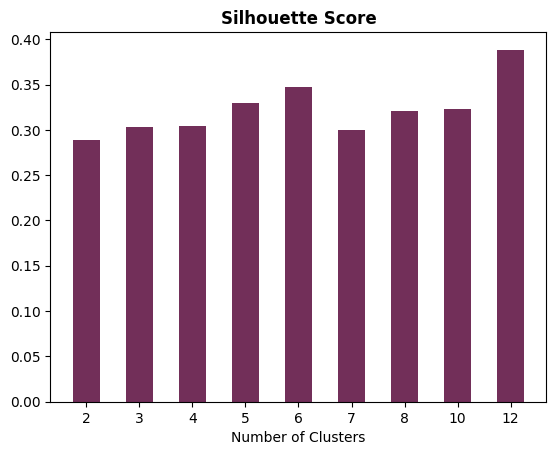

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

# candidate values for our number of cluster parameters
parameters = [2, 3, 4 , 5, 6, 7, 8, 10, 12]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols]) # fit model on dataset, this will find clusters based on parameter p
    num_data = data[num_cols].to_numpy() # create array of just the numerical columns
    ss = metrics.silhouette_score(num_data, kproto_model.labels_) # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

# candidate values for our number of cluster parameters
parameters = [12]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols]) # fit model on dataset, this will find clusters based on parameter p
    num_data = data[num_cols].to_numpy() # create array of just the numerical columns
    ss = metrics.silhouette_score(num_data, kproto_model.labels_) # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


ValueError: ignored

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

# candidate values for our number of cluster parameters
parameters = [2, 3, 4 , 5, 6, 7, 8, 10, 12]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols]) # fit model on dataset, this will find clusters based on parameter p
    num_data = data[num_cols].to_numpy() # create array of just the numerical columns
    ss = metrics.silhouette_score(num_data, kproto_model.labels_) # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()



Parameter: {'n_clusters': 2} Score 0.8482032866669112
Parameter: {'n_clusters': 3} Score 0.6637623799287828
Parameter: {'n_clusters': 4} Score 0.6278993221002638


KeyboardInterrupt: ignored

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
data = finald.drop(['dateRep'], axis=1)

# identify categorical and numerical columns
cat_cols = ['geoId', 'TargetGroup', 'Vaccine']
num_cols = list(set(data.columns) - set(cat_cols))

In [ ]:
# instantiate KPrototypes model with the best number of clusters
kproto_model = KPrototypes(n_clusters=3)

# fit model to data
kproto_model.fit(data, categorical=[data.columns.get_loc(col) for col in cat_cols])

# predict cluster labels for data
cluster_labels = kproto_model.fit_predict(data, categorical=[data.columns.get_loc(col) for col in cat_cols])


In [ ]:
data['cluster'] = cluster_labels

# Group the data by cluster and country and count the number of countries in each cluster
grouped = data.groupby(['cluster', 'geoId']).size().reset_index(name='count')

In [ ]:
grouped

,cluster,geoId,count
0,0,AT,12672
1,0,BE,4738
2,0,CZ,4125
3,0,EL,10980
4,0,HU,5029
5,0,NL,5940
6,0,PT,5476
7,0,RO,3521
8,0,SE,3073
9,1,BG,3933


In [ ]:
cases_per_cluster = data.groupby('cluster')['cases'].sum().reset_index(name='cases_sum')

In [ ]:
cases_per_cluster

,cluster,cases_sum
0,0,349281495.0
1,1,67992875.0
2,2,345477292.0


In [ ]:
finald

,dateRep,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population
0,23/10/2022,0.072635,-0.611612,AT,0,0.708327,2,-0.070271,-0.067103,-0.044736,0.005979,-0.003120,-0.058867,ALL,MODBA.1,0.050193
1,23/10/2022,0.072635,-0.611612,AT,0,0.708327,2,-0.070178,-0.066793,-0.043941,0.053812,0.013966,-0.058867,ALL,COMBA.1,0.050193
2,23/10/2022,0.072635,-0.611612,AT,0,0.708327,2,-0.070338,-0.067090,-0.044839,-0.059836,-0.025230,-0.058867,ALL,NVXD,0.050193
3,23/10/2022,0.072635,-0.611612,AT,0,0.708327,2,-0.070098,-0.066658,-0.044736,-0.057943,-0.022215,-0.058867,ALL,VLA,0.050193
4,23/10/2022,0.072635,-0.611612,AT,0,0.708327,2,-0.067113,-0.065027,-0.023240,3.693322,1.296388,-0.058867,ALL,COMBA.4-5,0.050193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,27/12/2020,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,COMBA.1,0.258187
37462,27/12/2020,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,AZ,0.258187
37463,27/12/2020,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,MOD,0.258187
37464,27/12/2020,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,COMBA.4-5,0.258187


In [ ]:
data

,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population,cluster
0,0.072635,-0.611612,AT,0,0.708327,2,-0.070271,-0.067103,-0.044736,0.005979,-0.003120,-0.058867,ALL,MODBA.1,0.050193,0
1,0.072635,-0.611612,AT,0,0.708327,2,-0.070178,-0.066793,-0.043941,0.053812,0.013966,-0.058867,ALL,COMBA.1,0.050193,0
2,0.072635,-0.611612,AT,0,0.708327,2,-0.070338,-0.067090,-0.044839,-0.059836,-0.025230,-0.058867,ALL,NVXD,0.050193,0
3,0.072635,-0.611612,AT,0,0.708327,2,-0.070098,-0.066658,-0.044736,-0.057943,-0.022215,-0.058867,ALL,VLA,0.050193,0
4,0.072635,-0.611612,AT,0,0.708327,2,-0.067113,-0.065027,-0.023240,3.693322,1.296388,-0.058867,ALL,COMBA.4-5,0.050193,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,COMBA.1,0.258187,9
37462,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,AZ,0.258187,9
37463,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,MOD,0.258187,9
37464,-0.435788,-0.611612,EL,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,COMBA.4-5,0.258187,9


In [ ]:
code_map = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'HR': 'HRV', 'CY': 'CYP',
            'CZ': 'CZE', 'DK': 'DNK', 'EE': 'EST', 'FI': 'FIN', 'FR': 'FRA',
            'DE': 'DEU', 'EL': 'GRC', 'HU': 'HUN', 'IS': 'ISL', 'IE': 'IRL',
            'IT': 'ITA', 'LV': 'LVA', 'LI': 'LIE', 'LT': 'LTU', 'LU': 'LUX',
            'MT': 'MLT', 'NL': 'NLD', 'NO': 'NOR', 'PL': 'POL', 'PT': 'PRT',
            'RO': 'ROU', 'SK': 'SVK', 'SI': 'SVN', 'ES': 'ESP', 'SE': 'SWE'}
data['geoId'] = data['geoId'].map(code_map)

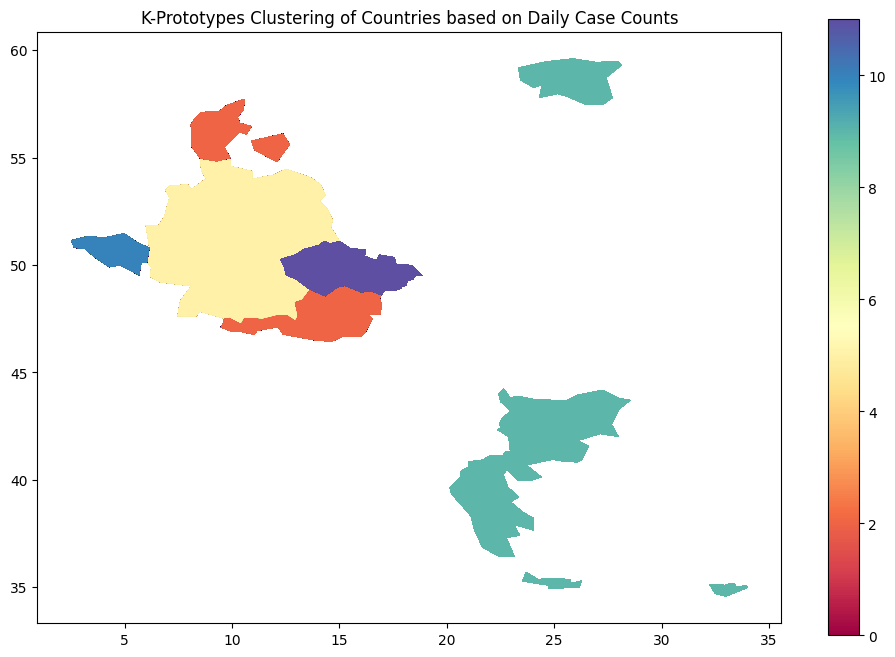

In [ ]:
# Load a dataset of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the country boundaries with the clustered data
merged = world.merge(data, left_on='iso_a3', right_on='geoId')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

merged.plot(column='cluster', cmap='Spectral',  aspect=1, legend=True, ax=ax)
ax.set_title('K-Prototypes Clustering of Countries based on Daily Case Counts')
plt.show()

In [ ]:
beta = 0.5
n_clusters = 3
centroids = kproto_model.cluster_centroids_

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []


In [ ]:
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        print("Cluster", i, "has no points assigned to it")
    else:
        total_cost = kproto_model.cost_
        epsilon = total_cost / len(cluster_points)
        if epsilon > beta * median_epsilon:
            print("Cluster", i, "is sparse")
        elif epsilon < beta * median_epsilon / 2:
            print("Cluster", i, "is dense")
        else:
            print("Cluster", i, "is normal")


Cluster 0 is normal
Cluster 1 is normal
Cluster 2 is sparse


In [ ]:
import numpy as np

# Fit the KModes clustering algorithm
n_clusters = 12



# Calculate the centroid position and ε for each cluster
centroids = kproto_model.cluster_centroids_
centroids = centroids.reshape((n_clusters, -1, 1))

epsilon = []
for i in range(len(centroids)):
    cluster_points = data[data['cluster'] == i]
    distance = np.sum((cluster_points.drop(['cluster'], axis=1).values - centroids[i])**2, axis=1)

    mean_distance = np.mean(distance)
    epsilon.append(mean_distance)

# Calculate the median ε of all clusters
beta = np.median(epsilon)

# Determine which clusters are sparse based on the density parameter β
sparse_clusters = []
for i in range(len(centroids)):
    if epsilon[i] > beta:
        sparse_clusters.append(i)

# Print the results
if len(sparse_clusters) > 0:
    print(f"The following clusters are sparse: {sparse_clusters}")
else:
    print("No sparse clusters found.")


ValueError: ignored

In [ ]:
beta = 0.5
n_clusters=12
centroids = kproto_model.cluster_centroids_
for i in range(len(centroids)):
    cluster_points = data[data['cluster'] == i]

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    if kproto_model.cost_ == 0:
        break
    total_cost = kproto_model.cost_
    print("Iteration:", i, "Total Cost:", total_cost)

    epsilon = total_cost / len(cluster_points)
    epsilons.append(epsilon)

# Determine whether each cluster is sparse or not
median_epsilon = np.median(epsilons)
sparse_clusters = []
for i, epsilon in enumerate(epsilons):
    if epsilon > beta * median_epsilon:
        sparse_clusters.append(i)

Iteration: 0 Total Cost: 3.144659842247785e+18
Iteration: 1 Total Cost: 3.144659842247785e+18
Iteration: 2 Total Cost: 3.144659842247785e+18
Iteration: 3 Total Cost: 3.144659842247785e+18
Iteration: 4 Total Cost: 3.144659842247785e+18
Iteration: 5 Total Cost: 3.144659842247785e+18
Iteration: 6 Total Cost: 3.144659842247785e+18
Iteration: 7 Total Cost: 3.144659842247785e+18
Iteration: 8 Total Cost: 3.144659842247785e+18
Iteration: 9 Total Cost: 3.144659842247785e+18
Iteration: 10 Total Cost: 3.144659842247785e+18
Iteration: 11 Total Cost: 3.144659842247785e+18


In [ ]:
beta = 0.5
n_clusters = 12
centroids = kproto_model.cluster_centroids_

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        print("Cluster", i, "has no points assigned to it")
    else:
        total_cost = kproto_model.cost_
        epsilon = total_cost / len(cluster_points)
        if epsilon > beta * median_epsilon:
            print("Cluster", i, "is sparse")
        elif epsilon < beta * median_epsilon / 2:
            print("Cluster", i, "is dense")
        else:
            print("Cluster", i, "is normal")

Cluster 0 is dense
Cluster 1 is sparse
Cluster 2 is dense
Cluster 3 is sparse
Cluster 4 is sparse
Cluster 5 is sparse
Cluster 6 is normal
Cluster 7 is sparse
Cluster 8 is dense
Cluster 9 is dense
Cluster 10 is dense
Cluster 11 is sparse


In [ ]:
data.iloc[:, 1]

0       -0.611612
1       -0.611612
2       -0.611612
3       -0.611612
4       -0.611612
           ...   
37461   -0.611612
37462   -0.611612
37463   -0.611612
37464   -0.611612
37465   -0.611612
Name: deaths, Length: 37466, dtype: float64

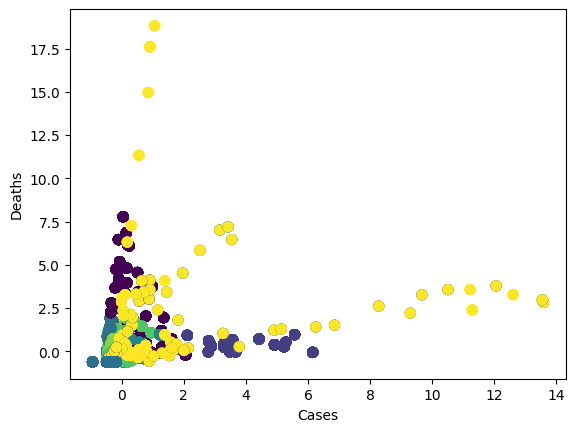

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()


In [ ]:
# Create a new column to store the risk labels
data['risk_label'] = ''

# Assign risk labels based on cluster values
for i in range(len(data)):
    if cluster_labels[i] in [5, 6]:
        data.loc[i, 'risk_label'] = 'Low risk'
    else:
        data.loc[i, 'risk_label'] = 'High risk'


In [ ]:
data

,cases,deaths,geoId,international_travel_controls,GDP,school_closures,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,TargetGroup,Vaccine,Population,cluster,risk_label
0,0.072635,-0.611612,AUT,0,0.708327,2,-0.070271,-0.067103,-0.044736,0.005979,-0.003120,-0.058867,ALL,MODBA.1,0.050193,5,Low risk
1,0.072635,-0.611612,AUT,0,0.708327,2,-0.070178,-0.066793,-0.043941,0.053812,0.013966,-0.058867,ALL,COMBA.1,0.050193,5,Low risk
2,0.072635,-0.611612,AUT,0,0.708327,2,-0.070338,-0.067090,-0.044839,-0.059836,-0.025230,-0.058867,ALL,NVXD,0.050193,5,Low risk
3,0.072635,-0.611612,AUT,0,0.708327,2,-0.070098,-0.066658,-0.044736,-0.057943,-0.022215,-0.058867,ALL,VLA,0.050193,5,Low risk
4,0.072635,-0.611612,AUT,0,0.708327,2,-0.067113,-0.065027,-0.023240,3.693322,1.296388,-0.058867,ALL,COMBA.4-5,0.050193,5,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,-0.435788,-0.611612,GRC,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,COMBA.1,0.258187,4,High risk
37462,-0.435788,-0.611612,GRC,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,AZ,0.258187,4,High risk
37463,-0.435788,-0.611612,GRC,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,MOD,0.258187,4,High risk
37464,-0.435788,-0.611612,GRC,3,-1.385881,3,-0.070338,-0.067117,-0.044907,-0.061147,-0.025230,-0.058867,HCW,COMBA.4-5,0.258187,4,High risk


In [ ]:
from sklearn.manifold import TSNE

# fit and transform the data to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

# create a scatter plot of the data colored by cluster labels
plt.scatter(data_2d[:,0], data_2d[:,1], c=cluster_labels)
plt.title('Clusters')
plt.show()


ValueError: ignored

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# select only the numerical columns from the input data
num_cols = finald.select_dtypes(include=['float', 'int']).columns
data = finald

# select only the categorical columns from the input data and convert to strings
cat_cols = finald.select_dtypes(include=['object']).astype(str).columns

# candidate values for our number of cluster parameters
parameters = [2, 3, 4]

# instantiate ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=list(cat_cols)) # fit model on dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kproto_model.labels_, metric='precomputed') # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


TypeError: ignored

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import OneHotEncoder

# select only the numerical columns from the input data
num_cols = finald.select_dtypes(include=['float', 'int']).columns
data_num = finald[num_cols]

# select only the categorical columns from the input data
cat_cols = finald.select_dtypes(include=['object']).columns
data_cat = finald[cat_cols]

# one-hot encode categorical features
encoder = OneHotEncoder()
data_cat_encoded = encoder.fit_transform(data_cat)

# combine numerical and encoded categorical features
data = np.hstack((data_num, data_cat_encoded.toarray()))

# candidate values for our number of cluster parameters
parameters = [2, 3, 4]

# instantiate ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kproto_model = KPrototypes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kproto_model.set_params(**p) # set current hyper parameter
    kproto_model.fit(data, categorical=list(range(len(cat_cols)))) # fit model on dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kproto_model.labels_, metric='precomputed') # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


ValueError: ignored

In [ ]:
from kmodes.kmodes import KModes
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

data = finald.drop(['dateRep'], axis=1)
# candidate values for our number of cluster parameters
parameters = [2, 3, 4]

# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1
kmodes_model = KModes()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kmodes_model.set_params(**p) # set current hyper parameter
    kmodes_model.fit(data) # fit model on dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmodes_model.labels_) # calculate silhouette_score
    silhouette_scores += [ss] # store all the scores
    print('Parameter:', p, 'Score', ss)

    # check if p has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()


ValueError: ignored

Parameter: {'eps': 0.5, 'min_samples': 2} Score 0.623321434605776
Parameter: {'eps': 0.5, 'min_samples': 3} Score 0.5877870119214695
Parameter: {'eps': 0.5, 'min_samples': 4} Score 0.5400351585633915
Parameter: {'eps': 1, 'min_samples': 2} Score 0.1437340240507084
Parameter: {'eps': 1, 'min_samples': 3} Score 0.12733135847069768
Parameter: {'eps': 1, 'min_samples': 4} Score 0.10456460746241783
Parameter: {'eps': 2, 'min_samples': 2} Score -0.09688312366922051
Parameter: {'eps': 2, 'min_samples': 3} Score -0.07091024251747548
Parameter: {'eps': 2, 'min_samples': 4} Score -0.06401597624410243
Parameter: {'eps': 3, 'min_samples': 2} Score -0.31560676553934774
Parameter: {'eps': 3, 'min_samples': 3} Score -0.3012229299733258
Parameter: {'eps': 3, 'min_samples': 4} Score -0.2714607179625957


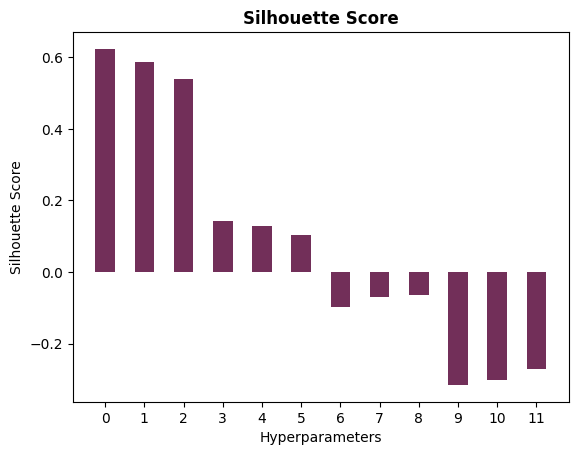

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid
data = finald.drop(['dateRep', 'geoId'], axis=1)

# candidate values for eps and min_samples parameters
eps_values = [0.5, 1, 2, 3]
min_samples_values = [2, 3, 4]

# instantiating ParameterGrid, pass eps and min_samples as input
parameter_grid = ParameterGrid({'eps': eps_values, 'min_samples': min_samples_values})

best_score = -1
dbscan_model = DBSCAN()
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    dbscan_model.set_params(**p) # set current hyper parameter
    dbscan_model.fit(data) # fit model on dataset, this will find clusters based on parameter p
    if len(set(dbscan_model.labels_)) > 1: # check if there are more than one cluster
        ss = metrics.silhouette_score(data, dbscan_model.labels_) # calculate silhouette_score
        silhouette_scores += [ss] # store all the scores
        print('Parameter:', p, 'Score', ss)

        # check if p has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), np.arange(len(silhouette_scores)))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Hyperparameters')
plt.ylabel('Silhouette Score')
plt.show()


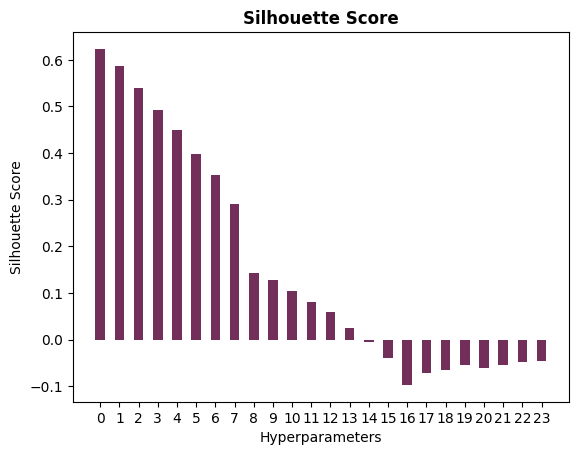

In [ ]:
# plotting silhouette score
plt.bar(np.arange(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(np.arange(len(silhouette_scores)), np.arange(len(silhouette_scores)))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Hyperparameters')
plt.ylabel('Silhouette Score')
plt.show()


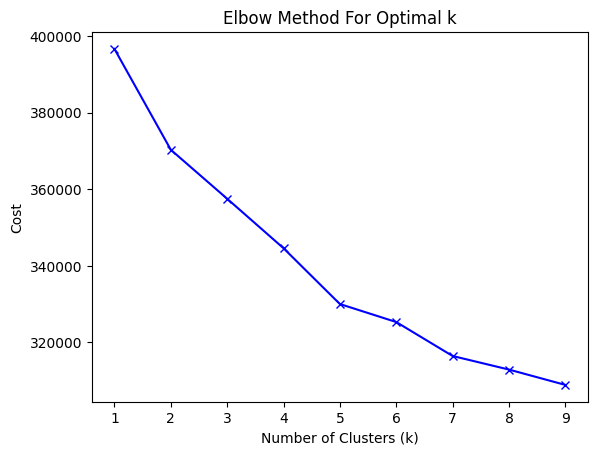

In [ ]:
data = finald.drop(['dateRep', 'geoId'], axis=1)




# Use the elbow method to determine optimal number of clusters
cost = []
K = range(1, 10)
for k in K:
    km = KModes(n_clusters=k, init='Cao', n_init=10, verbose=0, random_state=42)
    km.fit(data)
    cost.append(km.cost_)

# Plot the elbow curve
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
clusters = km.fit_predict(finald)

In [ ]:
clustersf = km.fit_predict(data)

In [ ]:
#merged_datasetfu = merged_datasetfu.fillna(0)

In [ ]:
data.geoId.unique()

array([ 0,  1,  2, 12,  3,  4,  6,  7, 10, 11,  5,  8, 13, 15, 14, 16, 19,
       17, 18, 20, 21, 22, 23, 24, 25, 28, 27,  9, 26])

In [ ]:
data

In [ ]:
data['cluster'] = clustersf

# Group the data by cluster and country and count the number of countries in each cluster
grouped = data.groupby(['cluster', 'geoIdv']).size().reset_index(name='count')

# Print the results
print(grouped)

    cluster  geoIdv  count
0         0       0    423
1         0       1   1644
2         0       2    430
3         0       3    476
4         0       4    892
..      ...     ...    ...
69        8       4    276
70        8       5     28
71        8       6     79
72        8       7      1
73        8       9      2

[74 rows x 3 columns]


In [ ]:
finald['cluster'] = clusters

# Group the data by cluster and country and count the number of countries in each cluster
grouped = finald.groupby(['cluster', 'geoId']).size().reset_index(name='count')

# Print the results
print(grouped)

    cluster geoId  count
0         0    AT     73
1         0    BE    846
2         0    BG    192
3         0    CZ    381
4         0    DE    219
..      ...   ...    ...
63        8    DE      3
64        8    DK    178
65        8    EE   3645
66        8    EL      7
67        8    ES     28

[68 rows x 3 columns]


In [ ]:
code_map = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'HR': 'HRV', 'CY': 'CYP',
            'CZ': 'CZE', 'DK': 'DNK', 'EE': 'EST', 'FI': 'FIN', 'FR': 'FRA',
            'DE': 'DEU', 'EL': 'GRC', 'HU': 'HUN', 'IS': 'ISL', 'IE': 'IRL',
            'IT': 'ITA', 'LV': 'LVA', 'LI': 'LIE', 'LT': 'LTU', 'LU': 'LUX',
            'MT': 'MLT', 'NL': 'NLD', 'NO': 'NOR', 'PL': 'POL', 'PT': 'PRT',
            'RO': 'ROU', 'SK': 'SVK', 'SI': 'SVN', 'ES': 'ESP', 'SE': 'SWE'}
finald['geoId'] = finald['geoId'].map(code_map)

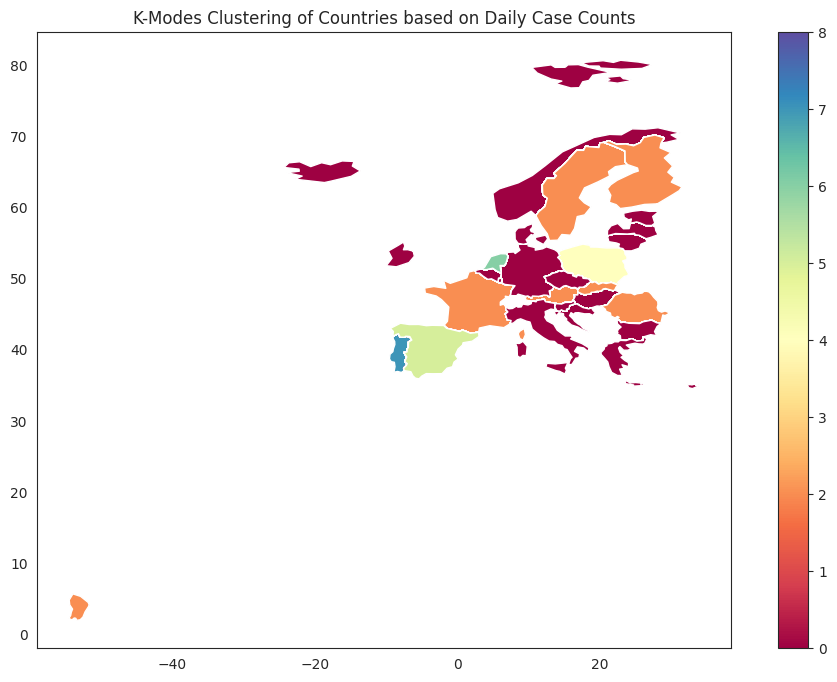

In [ ]:
# Load a dataset of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the country boundaries with the clustered data
merged = world.merge(finald, left_on='iso_a3', right_on='geoId')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

merged.plot(column='cluster', cmap='Spectral',  aspect=1, legend=True, ax=ax)
ax.set_title('K-Modes Clustering of Countries based on Daily Case Counts')
plt.show()


Lets check sparsity and how small are clusters.

In [ ]:
print(km.cost_)

382168.0


In [ ]:
import numpy as np

# Fit the KModes clustering algorithm
n_clusters = 8



# Calculate the centroid position and ε for each cluster
centroids = km.cluster_centroids_
centroids = centroids.reshape((n_clusters, -1, 1))

epsilon = []
for i in range(len(centroids)):
    cluster_points = data[data['cluster'] == i]
    distance = np.sum((cluster_points.drop(['cluster'], axis=1).values - centroids[i])**2, axis=1)

    mean_distance = np.mean(distance)
    epsilon.append(mean_distance)

# Calculate the median ε of all clusters
beta = np.median(epsilon)

# Determine which clusters are sparse based on the density parameter β
sparse_clusters = []
for i in range(len(centroids)):
    if epsilon[i] > beta:
        sparse_clusters.append(i)

# Print the results
if len(sparse_clusters) > 0:
    print(f"The following clusters are sparse: {sparse_clusters}")
else:
    print("No sparse clusters found.")


ValueError: ignored

In [ ]:
beta = 0.5
n_clusters=9
centroids = km.cluster_centroids_
for i in range(len(centroids)):
    cluster_points = data[data['cluster'] == i]

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    if km.cost_ == 0:
        break
    total_cost = km.cost_
    print("Iteration:", i, "Total Cost:", total_cost)

    epsilon = total_cost / len(cluster_points)
    epsilons.append(epsilon)

# Determine whether each cluster is sparse or not
median_epsilon = np.median(epsilons)
sparse_clusters = []
for i, epsilon in enumerate(epsilons):
    if epsilon > beta * median_epsilon:
        sparse_clusters.append(i)



Iteration: 0 Total Cost: 308867.0
Iteration: 1 Total Cost: 308867.0
Iteration: 2 Total Cost: 308867.0
Iteration: 3 Total Cost: 308867.0
Iteration: 4 Total Cost: 308867.0
Iteration: 5 Total Cost: 308867.0
Iteration: 6 Total Cost: 308867.0
Iteration: 7 Total Cost: 308867.0
Iteration: 8 Total Cost: 308867.0


In [ ]:
beta = 0.5
n_clusters = 9
centroids = km.cluster_centroids_

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        continue
    total_cost = km.cost_
    epsilon = total_cost / len(cluster_points)
    epsilons.append(epsilon)

# Determine which clusters are sparse or dense
median_epsilon = np.median(epsilons)
sparse_clusters = []
dense_clusters = []
for i, epsilon in enumerate(epsilons):
    if epsilon > beta * median_epsilon:
        sparse_clusters.append(i)
    else:
        dense_clusters.append(i)


In [ ]:
beta = 0.5
n_clusters = 9
centroids = km.cluster_centroids_

# Calculate the within-cluster sum of squares (epsilon) for each cluster
epsilons = []
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        print("Cluster", i, "has no points assigned to it")
    else:
        total_cost = km.cost_
        epsilon = total_cost / len(cluster_points)
        if epsilon > beta * median_epsilon:
            print("Cluster", i, "is sparse")
        elif epsilon < beta * median_epsilon / 2:
            print("Cluster", i, "is dense")
        else:
            print("Cluster", i, "is normal")

In [ ]:
for i in range(n_clusters):
    cluster_points = data[data['cluster'] == i]
    if len(cluster_points) == 0:
        print("Cluster", i, "has no points assigned to it")
    else:
        total_cost = km.cost_
        epsilon = total_cost / len(cluster_points)
        if epsilon > beta * median_epsilon:
            print("Cluster", i, "is sparse")
        elif epsilon < beta * median_epsilon / 2:
            print("Cluster", i, "is dense")
        else:
            print("Cluster", i, "is normal")


Cluster 0 is normal
Cluster 1 is sparse
Cluster 2 is sparse
Cluster 3 is sparse
Cluster 4 is sparse
Cluster 5 is sparse
Cluster 6 is sparse
Cluster 7 is sparse
Cluster 8 is sparse


In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming kmodes object is already fitted and has the attribute "labels_"
labels = km.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(data, labels)

print("The average silhouette score is:", silhouette_avg)



The average silhouette score is: -0.3155963417243339


In [ ]:
cluster_sizes = data['cluster'].value_counts()
print(cluster_sizes)



0    33939
3    21147
2    20187
1    15382
4    15168
5    12072
8     8457
7     7453
6     6585
Name: cluster, dtype: int64


In [ ]:
merged_datasetfb.cluster.isnull().sum()

0

In [ ]:
expected_cluster_size = len(merged_datasetfb) / n_clusters
alpha = 0.1
small_clusters = []
for i, cluster_points in enumerate(clusters):
    actual_cluster_size = cluster_points.shape[0] if cluster_points.shape else 0
    if actual_cluster_size < expected_cluster_size * alpha:
        small_clusters.append(i)


In [ ]:
merged_datasetfb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,...,Entity_x,international_travel_controls,dateRep2,Country,GDP,Entity_y,school_closures,cluster,clusterlabel,risk_label
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,...,Austria,0,2022,Austria,52061.652,Austria,2,0,NaN,High risk
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,...,Austria,0,2022,Austria,52061.652,Austria,2,0,NaN,High risk
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,...,Austria,0,2022,Austria,52061.652,Austria,2,0,NaN,High risk
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,...,Austria,0,2022,Austria,52061.652,Austria,2,0,NaN,High risk
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,...,Austria,0,2022,Austria,52061.652,Austria,2,0,NaN,High risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27735,08/02/2020,8,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,...,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,NaN,Low risk
27736,07/02/2020,7,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,...,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,NaN,Low risk
27737,06/02/2020,6,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,...,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,NaN,Low risk
27738,05/02/2020,5,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,...,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,NaN,Low risk


In [ ]:
cluster_means = data.groupby('cluster')['cases'].mean()

In [ ]:
cluster_means2 = merged_datasetfb.groupby('cluster')['deaths'].mean()

In [ ]:
cluster_means

cluster
0     0.006282
1     0.186959
2     3.643123
3     3.823279
4    -0.397482
5     0.087341
6     3.157194
7    -0.107051
8    -0.356074
9    -0.320256
10   -0.308478
11    1.929126
Name: cases, dtype: float64

In [ ]:


# Create a new column to store the risk labels
merged_datasetfb['risk_label'] = ''

# Assign risk labels based on cluster values
for i in range(len(merged_datasetfb)):
    if merged_datasetfb.loc[i, 'cluster'] == 0:
        merged_datasetfb.loc[i, 'risk_label'] = 'High risk'
    elif merged_datasetfb.loc[i, 'cluster'] == 1:
        merged_datasetfb.loc[i, 'risk_label'] = 'Low risk'
    else:
        merged_datasetfb.loc[i, 'risk_label'] = 'Unknown'




In [ ]:
merged_datasetfb = merged_datasetfb.drop('clusterlabel', axis=1)


In [ ]:
merged_datasetfb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,Entity_x,international_travel_controls,dateRep2,Country,GDP,Entity_y,school_closures,cluster,risk_label
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe,Austria,0,2022,Austria,52061.652,Austria,2,0,High risk
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe,Austria,0,2022,Austria,52061.652,Austria,2,0,High risk
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe,Austria,0,2022,Austria,52061.652,Austria,2,0,High risk
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe,Austria,0,2022,Austria,52061.652,Austria,2,0,High risk
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe,Austria,0,2022,Austria,52061.652,Austria,2,0,High risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27735,08/02/2020,8,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,Low risk
27736,07/02/2020,7,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,Low risk
27737,06/02/2020,6,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,Low risk
27738,05/02/2020,5,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe,Sweden,0,2020,Sweden,52706.294,Sweden,0,1,Low risk
